In [41]:
from PIL import Image
import glob
import numpy as np
import pandas as pd
import re

### Import first image:

In [35]:
file_list = []
for filename in glob.glob('data/train_images/*.jpg'): 
    file_list.append(filename)

train_images/100009.jpg


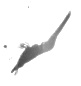

In [109]:
print(file_list[0])
Image.open(file_list[0])

### Extract dimensions of all images:

In [108]:
dims = []

for x in file_list:
    img = Image.open(x)
    dims.append([x,img.size[0],img.size[1]])


In [9]:
print(len(dims))
print(dims[0])

24204
['train_images/100009.jpg', 81, 86]


In [6]:
df = pd.DataFrame(dims)
df.columns = ['filename','x_dim','y_dim']
df.head()

,filename,x_dim,y_dim
0,train_images/100009.jpg,81,86
1,train_images/100010.jpg,35,47
2,train_images/100029.jpg,48,39
3,train_images/100040.jpg,47,41
4,train_images/100044.jpg,41,61


### Calculate maximum and average dimensions for all images:
We should scale up to the maximum dimensions for all images (reccommended) and pad the empty space with 0s to avoid stretching the image (will explain what I mean in another notebook)
Could scale down to 50x50 but would lose data - better to start with as much detail as possible and convolute to lower levels 

In [129]:
max_x = np.max(df['x_dim'])
max_y = np.max(df['y_dim'])

avg_x = np.mean(df['x_dim'])
avg_y = np.mean(df['y_dim'])

print(max_x,max_y,avg_x,avg_y)

(424, 428, 73.32110394976037, 66.46897207073211)


### Import identities:

In [130]:
df['img_no'] = df['filename'].apply(lambda x: filter(str.isdigit, x))
df.head()

,filename,x_dim,y_dim,img_no,image,unknown_unclassified,unknown_sticks,protist_star,copepod_cyclopoid_oithona,hydromedusae_solmundella,...,copepod_calanoid_eggs,shrimp_zoea,protist_fuzzy_olive,hydromedusae_partial_dark,copepod_other,echinoderm_larva_pluteus_typeC,copepod_calanoid,copepod_calanoid_eucalanus,detritus_filamentous,fish_larvae_very_thin_body
0,train_images/100009.jpg,81,86,100009,132103.jpg,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,train_images/100010.jpg,35,47,100010,66467.jpg,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,train_images/100029.jpg,48,39,100029,9143.jpg,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,train_images/100040.jpg,47,41,100040,20630.jpg,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,train_images/100044.jpg,41,61,100044,33689.jpg,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [132]:
train = pd.read_csv('train.csv')

In [14]:
train['img_no'] = df['img_no'].apply(lambda x: filter(str.isdigit, x))

df = df.merge(train)
df.head()

,filename,x_dim,y_dim,img_no,image,unknown_unclassified,unknown_sticks,protist_star,copepod_cyclopoid_oithona,hydromedusae_solmundella,...,copepod_calanoid_eggs,shrimp_zoea,protist_fuzzy_olive,hydromedusae_partial_dark,copepod_other,echinoderm_larva_pluteus_typeC,copepod_calanoid,copepod_calanoid_eucalanus,detritus_filamentous,fish_larvae_very_thin_body
0,train_images/100009.jpg,81,86,100009,132103.jpg,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,train_images/100010.jpg,35,47,100010,66467.jpg,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,train_images/100029.jpg,48,39,100029,9143.jpg,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,train_images/100040.jpg,47,41,100040,20630.jpg,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,train_images/100044.jpg,41,61,100044,33689.jpg,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Function calls random image of the selected type - good tool for exploring quickly
(opens in window)

In [126]:
def show_images(string):
    files = df['filename'][df[string] == 1].sample(1)
    files = files.iloc[0]
    img = Image.open(str(files))
    img.show()

In [128]:
show_images('copepod_cyclopoid_oithona')

train_images/10364.jpg
